### Class: Machine Learning <br> Date: 11/02/2018 <br> Mini-Project 2

### Members:
__Thomas Henderson__<br>
__Travis Hills__<br>
__Lucas Rufo__<br>
__Kyle Thomas__<br>

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Read in the data using Pandas

data = pd.read_csv("data/bezdekIris.csv")

# Separate lables and data
########## The labels used below have been added to the CSV file manually. Using loc and iloc 
########## seemed to fail in getting every sample, as the first was interpreted as the name of the column.

y = data["Class"].copy()
X = data.drop(["SW", "SL", "Class"], axis=1)

# Split the data into training and test sets. 
# By the 80-20 rule, 80% of the data is for training and 20% is reserved for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
# Data has been split. 
# There are no null entires.
# Normalize data if needed.
# Train SVM models and compare them

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1))
    ])
svm_clf.fit(X_train, y_train)

# Make predictions
test_pred = svm_clf.predict(X_test)    # Parameters are petal length, petal width

Confusion matrix, without normalization
[[ 7  0  0]
 [ 0 12  1]
 [ 0  1  9]]


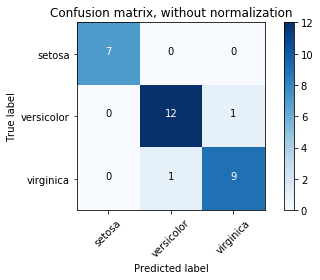

precision: 0.9333333333333333
recall: 0.9333333333333333
f1-score: 0.9333333333333333


In [24]:
# Trained linear SVM Classifier
# Now evaluate predictions using the confusion matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# List containing names of flowers. Used when plotting confusion matrix.
class_names = ['setosa', 'versicolor', 'virginica']

# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Calculate confusion matrix, plot it, and calculate precision; recall, and f1-score.
def evaluate(test, pred):
    confusionMat = confusion_matrix(test, pred)
    plot_confusion_matrix(confusionMat, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()
    # Compute the precision
    precision = precision_score(test, pred, average="weighted")
    recall = recall_score(test, pred, average="weighted")
    f1 = f1_score(test, pred, average="weighted")
    print("precision: " + str(precision))
    print("recall: " + str(recall))
    print("f1-score: " + str(f1))


evaluate(y_test, test_pred)